<a href="https://colab.research.google.com/github/nayeem01/facemask-detection/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm


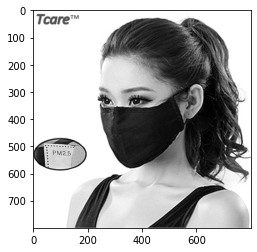

In [2]:

CATEGORIES = ["with_mask", "without_mask"]
DATADIR = "/kaggle/input/face-mask-dataset/data/"

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray')  
        plt.show()  
        break  
    break


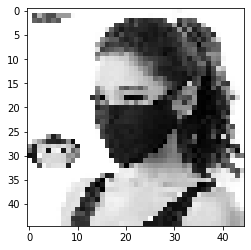

In [3]:
IMG_SIZE = 45
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

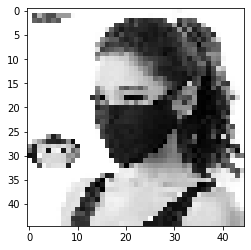

In [4]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category) 

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([resized_array, class_num])  
            except Exception as e: 
                pass
            

create_training_data()

100%|██████████| 3828/3828 [00:29<00:00, 130.19it/s]


In [6]:
# balancing training data
training_data = training_data[:7450]
print(len(training_data))
import random

random.shuffle(training_data)

7450


In [7]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [8]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()